## 分布に関して

分布はどの値にどれくらいデータが存在するかを表したもの。  
データの分布を図で表す事ができる。  

連続値→ヒストグラムを使用する。  
カテゴリ変数（離散値)→棒グラフを使用する。  

ヒストグラム  
→一つの連続変数の分布を表すのに使用する。  
→各棒の区間に感覚がない  
→横図はデータの区間で切られている。  

棒グラフ  
→一つのカテゴリ変数の分布を表すのに使用する事ができる  

## 記述統計と推測統計
記述統計→データの特徴を記述する。  
推測統計→標本から母集団の特徴を推測する。  

推測統計を行うには記述統計をもとに行なっている。


## 代表値に関して
平均値
→標本平均$\bar{x}$,母平均μで表される事が多い。  
平均値からの平方和が最も小さい。  

中央値  
→外れ値の影響を受けにくい。


## 散布度
→データがどれだけばらついているのかを表している。  
範囲  
→範囲の値は最大値~最小値で求めることができる。  
→外れ値に弱い。  

四分位数  
→データを並べて４分割した際の25%,50%75%のあたい  
→範囲よりは外れ値に強い。  
→四分位範囲→Q_3 - Q_1 , 四分位偏差→(Q_3 - Q_1)/2

平均偏差  
→平均からの偏差の絶対値の平均

分散
→平均からの偏差の2乗

標準偏差
→分散の平方根

## ２変数間の記述統計

共分散→連続変数間の相関関係を表す指標  
分散・共分散行列  
正の相関：両方ともの値が正もしくは負  
負の相関：片方が高ければ片方が低い
相関係数→共分散を標準化したもの。共分散の取りうる値を-1~1の範囲にすることをいう。  

カテゴリ変数間の相関関係をみてみる。
→分割表を用いて計算を行う。
→分割表内の数字を観測度数という。
→期待度数→カテゴリ同士に関連性がないとに観測されるであろう度数のこと。

連関はどうやってみるのか？？
→観測度数と期待度数がどれだけ離れているのかを確認する。（カイ二乗）
→カイ二乗値：（観測度数ー期待度数）^2/期待度数の総和
→ただここにには一点問題がある、それはこの値がどれだけ連関が強いのかがわからないということ。つまり、連続変数同士で確認した共分散みたいな値になってしまっている。
→よって、カイ二乗の値を標準化して強さを確認しなければならない。

クラメールの連関係数
→カイ二乗値を0~1に標準化したもの
→ライブラリにはこれに値するものがないため自分で作成する必要がある、
→


In [20]:
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd

In [2]:
df = sns.load_dataset("tips")
df["tip_ratio"] = df["tip"] / df["total_bill"]

## 分布に関して

分布はどの値にどれくらいデータが存在するかを表したもの。  
データの分布を図で表す事ができる。  

連続値→ヒストグラムを使用する。  
カテゴリ変数（離散値)→棒グラフを使用する。  

ヒストグラム  
→一つの連続変数の分布を表すのに使用する。  
→各棒の区間に感覚がない  
→横図はデータの区間で切られている。  

棒グラフ  
→一つのカテゴリ変数の分布を表すのに使用する事ができる  

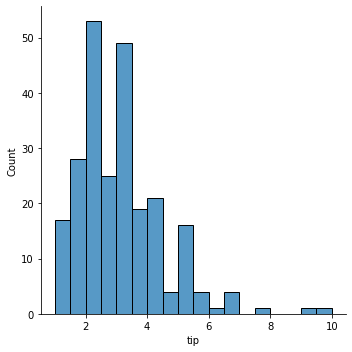

In [23]:
# 連続値のヒストグラムの作成
sns.displot(df["tip"],kde=False)

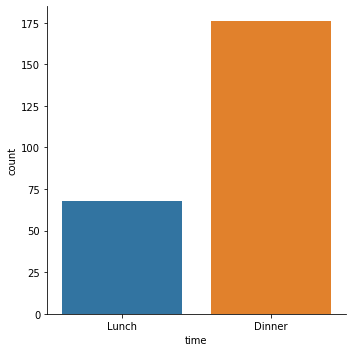

In [25]:
# カテゴリ変数の作成
sns.catplot(x="time", data=df , kind="count")

## 代表値に関して
平均値
→標本平均$\bar{x}$,母平均μで表される事が多い。  
平均値からの平方和が最も小さい。  


In [32]:
df["tip"].mean()

float

In [33]:
np.mean(df["tip"])

float

In [34]:
# グループごとの平均値
df.groupby("sex").mean()

,total_bill,tip,size,tip_ratio
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


<AxesSubplot:xlabel='sex', ylabel='tip_ratio'>

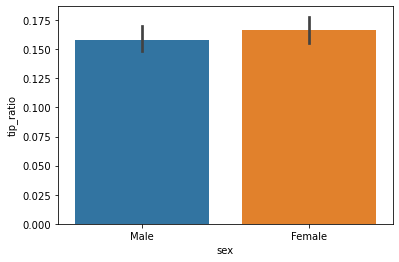

In [36]:
sns.barplot(x="sex" , y="tip_ratio" , data=df)

## 中央値

In [42]:
print("中央値")
print(df["tip_ratio"].median())

print("平均値")
print(df["tip_ratio"].mean())

中央値
0.15476977125802577
平均値
0.16080258172250478


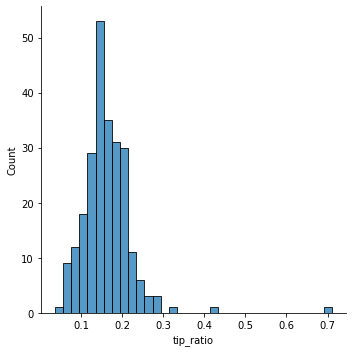

In [41]:
sns.displot(df["tip_ratio"])

In [45]:
mode , count = stats.mode(df["tip"])
print(mode)
print(count)

[2.]
[33]


## 四分位数

In [47]:
df['tip_ratio'].quantile([.25 , .5 , .75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_ratio, dtype: float64

<AxesSubplot:xlabel='size', ylabel='tip_ratio'>

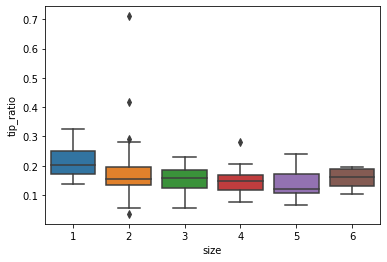

In [53]:
## 箱ひげ図
sns.boxplot(x="size" , y='tip_ratio',data = df)

## 分散・標準偏差


In [54]:
np.var(df["tip_ratio"])

0.0037145280013546928

In [55]:
np.std(df["tip_ratio"])

0.060946927743362855

## 共分散

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_ratio
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [4]:
# 何も設定しない場合はn-1の不偏分散が返ってくる。
np.cov(df["total_bill"] , df["tip_ratio"])

array([[ 7.92529386e+01, -1.84106502e-01],
       [-1.84106502e-01,  3.72981412e-03]])

In [9]:
## 単なる分散を求めたい場合はbias=Trueとする必要がある。
np.cov(df["total_bill"] , df["tip_ratio"] ,bias=True)

array([[ 7.89281315e+01, -1.83351967e-01],
       [-1.83351967e-01,  3.71452800e-03]])

In [8]:
# 分散の場合は何も設定しないと普通の分散が求められる。
np.var(df["tip_ratio"])

0.0037145280013546928

In [11]:
# 不偏分散を求める。
np.var(df["tip_ratio"], ddof=1)

0.003729814124817058

In [12]:
# 不偏分散と不偏共分散を表している。
df.cov()

,total_bill,tip,size,tip_ratio
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_ratio,-0.184107,0.028931,-0.008298,0.003730


## 相関を求める。

In [13]:
df.corr()

,total_bill,tip,size,tip_ratio
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_ratio,-0.338624,0.342370,-0.142860,1.000000


In [14]:
np.corrcoef(df["tip"] , df["total_bill"])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

<AxesSubplot:>

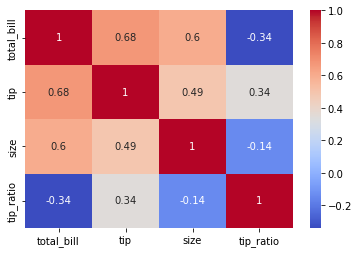

In [17]:
## ヒートマップで見る
sns.heatmap(df.corr() , cmap="coolwarm" , annot=True)

## 連関・分割表の作成

In [22]:
# 分割表を作成してみる。
pd.crosstab(df["sex"] , df["time"])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [18]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'tip_ratio'],
      dtype='object')

In [23]:
# カイ二乗値と期待度数を求める
# 第１戻り値：カイ二乗値　 第4戻り値:期待度数
cont_table = pd.crosstab(df["sex"] , df["time"])
stats.chi2_contingency(cont_table , correction=False )

(10.277251918677742,
 0.0013468039268008766,
 1,
 array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]]))

# 上記の値を確認すると、
カイ二乗値:10.277251918677742
期待度数値: array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]])

## クラメールの連関係数


In [30]:
def cramers_v(x , y):
    cont_table = pd.crosstab(x , y)
    chi2 = stats.chi2_contingency(cont_table , correction=False )[0]
    
    min_count = min(cont_table.shape)
    
    return np.sqrt(chi2 / ((min_count -1) * len(y)))

In [31]:
cramers_v(df["sex"] , df["time"])

0.20523129613344476